A short demo on running an MCMC

In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
import emcee

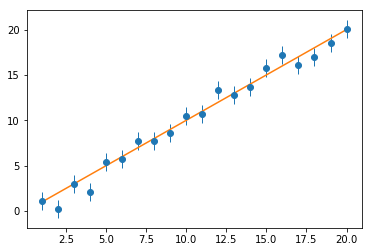

In [65]:


# let's make some fake data
x = np.linspace(1,20, 20)
sigma = np.ones_like(x)

# let's create a model with some parameters, and x as the independent variable
def model(a, b):
    return a*x + b

# let's create some data points with random noise injected
a_actual = 1
b_actual = 0
exact = model(a_actual, b_actual)
y = np.random.normal(exact, sigma, 20)

# let's plot those data, and the exact model that generated them
plt.errorbar(x, y, sigma, marker='o', linewidth=0, elinewidth=1)
plt.plot(x, model(a_actual, b_actual));

In [66]:
def lnprob(parameters):
    
    # pull out some parameters (a = slope, b = intercept)
    a, b = parameters
    
    # this is a Gaussian likelihood, for independent data points
    chisq = np.sum((y - model(a,b))**2/sigma**2)
    lnp = np.sum(1/np.sqrt(2*np.pi*sigma)) - 0.5*chisq

    
    return lnp

In [ ]:
def lnprob_other(parameters):
    
    # pull out some parameters (a = something, b = something else)
    a, b = parameters
    
    # this is a Gaussian likelihood, for independent data points
    lnp = - np.abs(a) - 
    lnp = np.sum(1/np.sqrt(2*np.pi*sigma)) - 0.5*chisq

    
    return lnp

In [11]:
# we can calculate the lnprob for any set of parameters
print(lnprob([42, 0]))
print(lnprob([0, 0]))

-2410197.32948
-1488.66791368


In [12]:
# intialize some walkers
ndim, nwalkers = 2, 100

# these are initial parameters
a_initial = np.random.uniform(0, 10, nwalkers)
b_initial = np.random.uniform(-3, 25, nwalkers)
p0 = np.transpose([a_initial, b_initial])

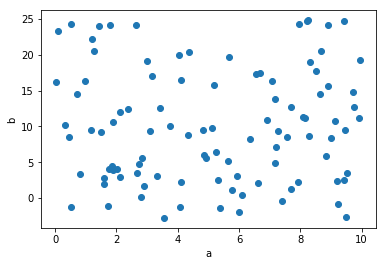

In [15]:
plt.scatter(a_initial, b_initial)
plt.xlabel('a'); plt.ylabel('b');

In [16]:
# create a sampler and run it
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
result = sampler.run_mcmc(p0, 1000)

2

In [62]:

def plot_chain(start=0, stop=1000):
    '''Plot the chain, in a couple different ways.'''

    a, b = sampler.chain.T
    a_trimmed, b_trimmed = sampler.chain.T[:, start:stop, :]


    plt.figure(figsize=(10,4))
    gs = plt.matplotlib.gridspec.GridSpec(2,2, hspace=0.25)
    
    ax_a = plt.subplot(gs[0,0])
    ax_a.plot(a); 
    ax_a.axvspan(start, stop, zorder=-1); 
    ax_a.set_ylabel('a')
    
    ax_b = plt.subplot(gs[1,0], sharex=ax_a)
    ax_b.plot(b)
    ax_b.axvspan(start, stop, zorder=-1)
    ax_b.set_ylabel('b')

    ax_both = plt.subplot(gs[:,1])
    
    ax_both.scatter(a_trimmed, b_trimmed, s=5, alpha=0.2)
    ax_both.set_title('{} to {}'.format(start, stop))
    ax_both.set_xlabel('a'); ax_both.set_ylabel('b');



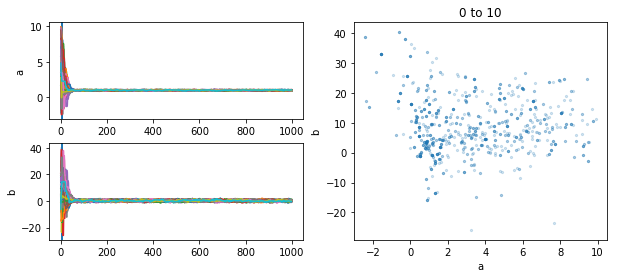

In [63]:
# the start of the chain is basically the initial walker locations
plot_chain(0, 10)

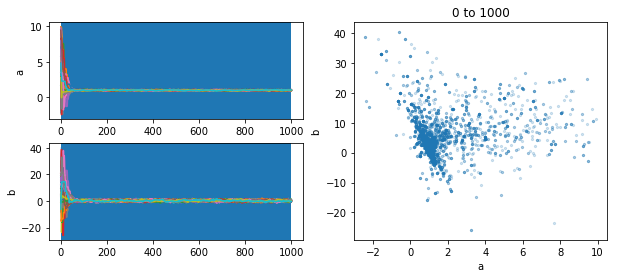

In [64]:
# the whole chain has memory of the initial conditions
plot_chain(0, 1000)

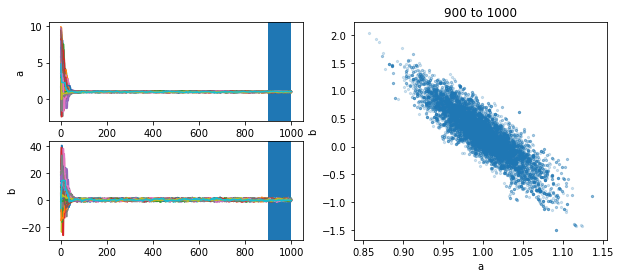

In [61]:
# evaluate the PDF from the later part of the chain
plot_chain(900, 1000)